# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:

* Which variables are important to predict the price of variable?
* How do these variables describe the price of the house?


# Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

## Technical Requirements:
* Data contains 1460 entries each having 81 variables.
* Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. You need to handle them accordingly.
* You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper
  Parameters.
* You need to find important features which affect the price positively or negatively.
* Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on
  test.csv file.


In [192]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Importing mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

#Importing SelectPercentile
from sklearn.feature_selection import SelectPercentile

#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#Import train test split
from sklearn.model_selection import train_test_split

#Importing Evaluation metrics for Regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Import Machine Mearning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
#Loading dataset
data = pd.read_csv(r"C:\Users\singh\Fliprobo\train.csv")
test_data = pd.read_csv(r"C:\Users\singh\Fliprobo\test.csv")

In [4]:
#Top 5 records
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
#Last 5 rows 
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,457,Unf,0,326,783,GasA,Ex,Y,SBrkr,807,702,0,1509,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,2,393,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [6]:
print( 'Dataset have \n',data.shape[0] ,'Rows','\n and\n',data.shape[1],' Columns')

Dataset have 
 1168 Rows 
 and
 81  Columns


# Missing Values

In [7]:
pd.set_option('display.max_rows', None)
(data.isnull().sum() / data.shape[0]) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
B

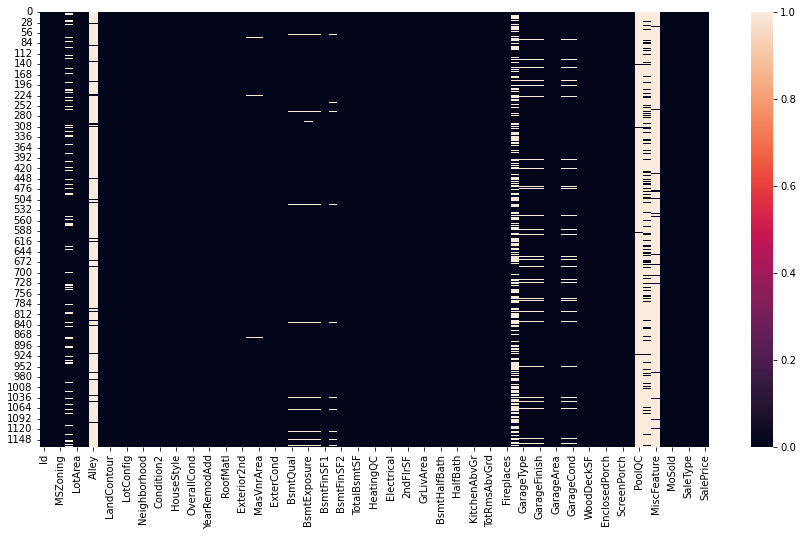

In [9]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.isnull())
plt.show()

* Few features have more than 90% records missing. It would not be good to fill them, better to delete them as they will not provide any useful insight for the prediction

In [10]:
#Delete features which have more missing values
data = data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [11]:
data.shape

(1168, 76)

In [12]:
pd.set_option('display.max_rows', None)
(data.isnull().sum() / data.shape[0]) * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [13]:
pd.set_option('display.max_columns', None)
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


In [14]:
#Find unique values in each feature
for i in data.columns:
    print(data[i].nunique(), i)

1168 Id
15 MSSubClass
5 MSZoning
106 LotFrontage
892 LotArea
2 Street
4 LotShape
4 LandContour
1 Utilities
5 LotConfig
3 LandSlope
25 Neighborhood
9 Condition1
8 Condition2
5 BldgType
8 HouseStyle
10 OverallQual
9 OverallCond
110 YearBuilt
61 YearRemodAdd
6 RoofStyle
8 RoofMatl
14 Exterior1st
15 Exterior2nd
4 MasVnrType
283 MasVnrArea
4 ExterQual
5 ExterCond
6 Foundation
4 BsmtQual
4 BsmtCond
4 BsmtExposure
6 BsmtFinType1
551 BsmtFinSF1
6 BsmtFinType2
122 BsmtFinSF2
681 BsmtUnfSF
636 TotalBsmtSF
6 Heating
5 HeatingQC
2 CentralAir
5 Electrical
669 1stFlrSF
351 2ndFlrSF
21 LowQualFinSF
746 GrLivArea
4 BsmtFullBath
3 BsmtHalfBath
4 FullBath
3 HalfBath
8 BedroomAbvGr
4 KitchenAbvGr
4 KitchenQual
12 TotRmsAbvGrd
7 Functional
4 Fireplaces
6 GarageType
97 GarageYrBlt
3 GarageFinish
5 GarageCars
392 GarageArea
5 GarageQual
5 GarageCond
3 PavedDrive
244 WoodDeckSF
176 OpenPorchSF
106 EnclosedPorch
18 3SsnPorch
65 ScreenPorch
8 PoolArea
20 MiscVal
12 MoSold
5 YrSold
9 SaleType
6 SaleCondition
58

In [15]:
data['Id'].nunique()

1168

In [16]:
data['Utilities'].unique()

array(['AllPub'], dtype=object)

In [17]:
data = data.drop(['Id','Utilities'], axis = 1)

In [18]:
data.shape

(1168, 74)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

* We have int, object (categorical) and float type datatypes features.

In [20]:
#Checking stats of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.0,0.0,1474.0


* Many features are in integer datatype but having categorical information.

In [21]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


# Visualization

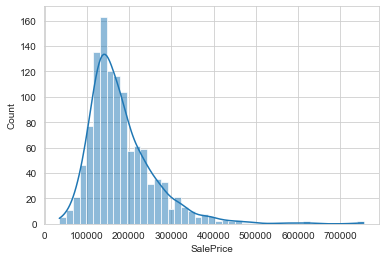

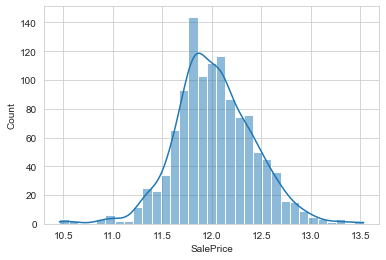

In [22]:
sns.set_style('whitegrid')

sns.histplot(data['SalePrice'], kde = True)
plt.show()


sns.histplot(np.log(data['SalePrice']), kde = True)
plt.show()

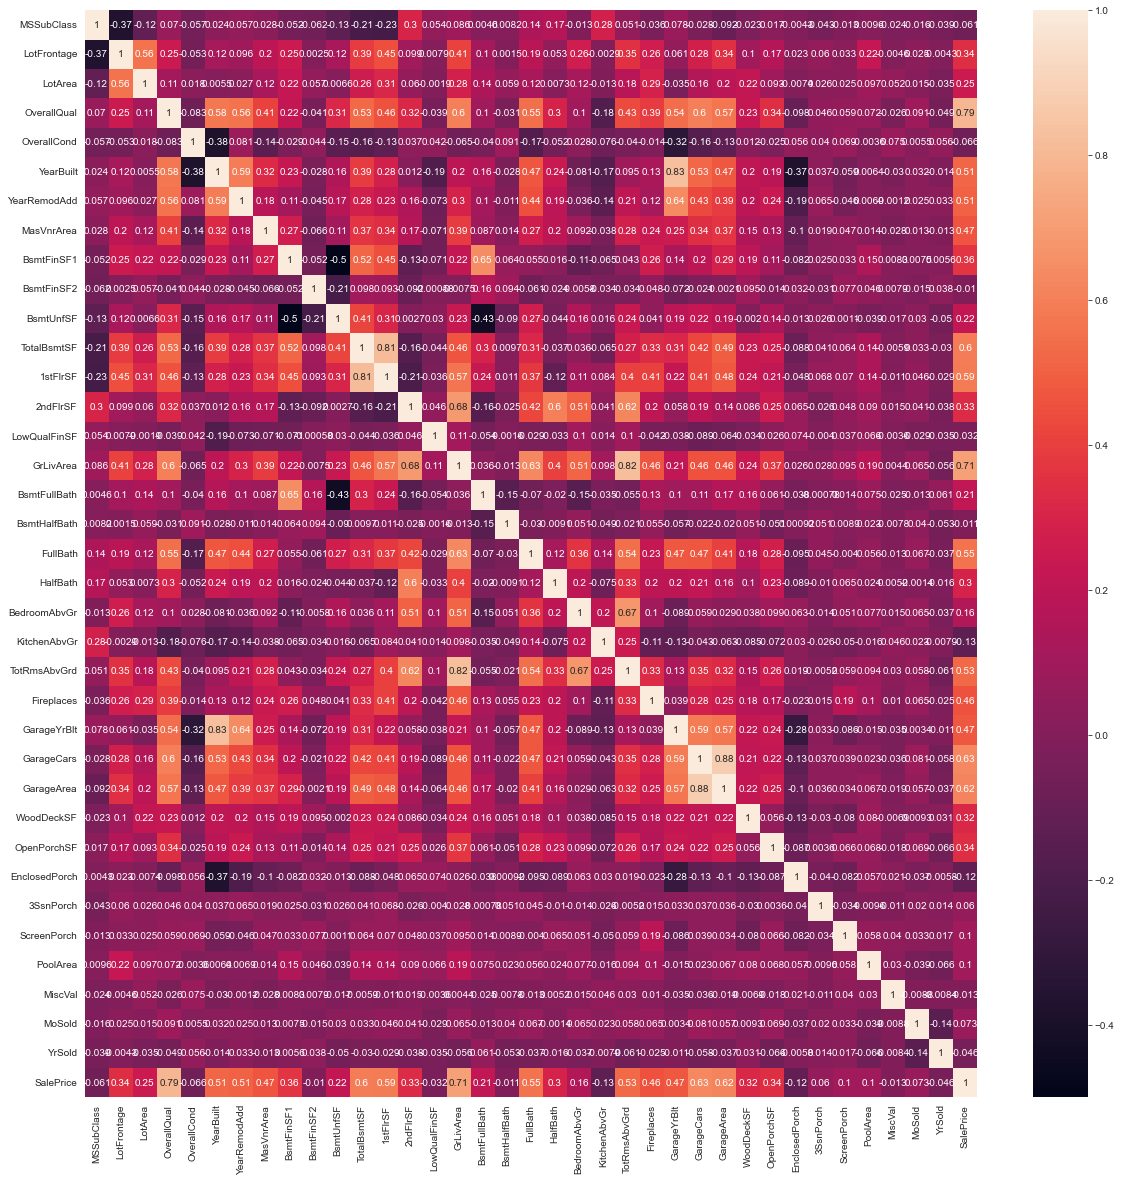

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)
plt.show()

* Few features are strongly correlated with target feature.
* Although, few independent features are good correlated with each other.

In [25]:
data['MSSubClass'].isnull().sum()

0

In [26]:
data['MSSubClass'].nunique()

15

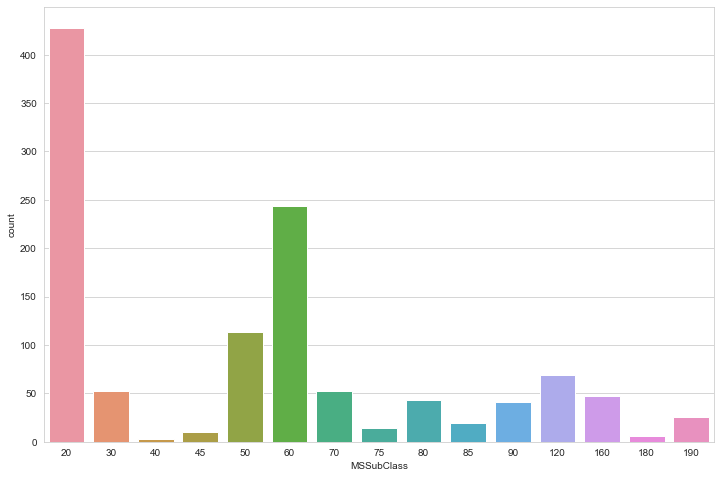

In [28]:
plt.figure(figsize = (12,8))
sns.countplot(data['MSSubClass'])
plt.show()

In [29]:
data['MSZoning'].isnull().sum()

0

In [30]:
data['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

* This is categorical feature, nominal.

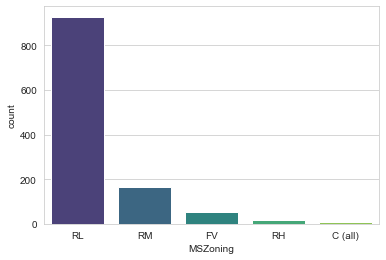

In [32]:
sns.countplot(data['MSZoning'], palette = 'viridis')
plt.show()

* Residential Low Density Zone house more in this dataset.

In [33]:
data.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending = False)

MSZoning
FV         209478.461538
RL         191004.181034
RH         131558.375000
RM         129070.975460
C (all)     75208.888889
Name: SalePrice, dtype: float64

In [36]:
def feature_details(i):
    print(i,' has total unique values = ',data[i].nunique() ,'out of ',data.shape[0])
    if data[i].nunique() < 10:
        print(data[i].unique())
    print('Feature datatype is = ',data[i].dtypes)
    print('Feature has ',(data[i].isnull().sum() / data.shape[0]) * 100,'%  missing values')
    
    if data[i].dtypes == 'O':
        sns.countplot(data[i])
        plt.show()
        print(data.groupby(i)['SalePrice'].mean().sort_values(ascending = False))
    elif data[i].dtypes != 'O':
        sns.scatterplot(data[i],data['SalePrice'])
        plt.show()

LotFrontage  has total unique values =  106 out of  1168
Feature datatype is =  float64
Feature has  18.32191780821918 %  missing values


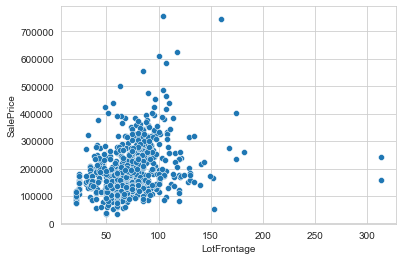

In [37]:
feature_details('LotFrontage')

In [38]:
data['LotFrontage'].isnull().sum() / data.shape[0]

0.1832191780821918

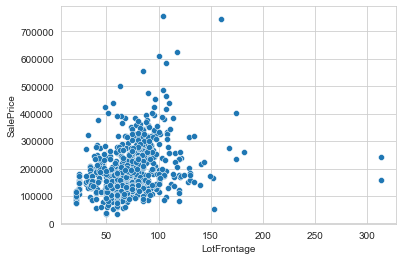

In [40]:
sns.scatterplot(data['LotFrontage'], data['SalePrice'])
plt.show()

LotArea  has total unique values =  892 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


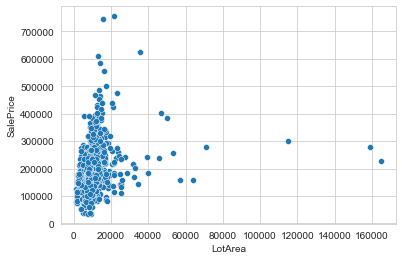

In [41]:
feature_details('LotArea')

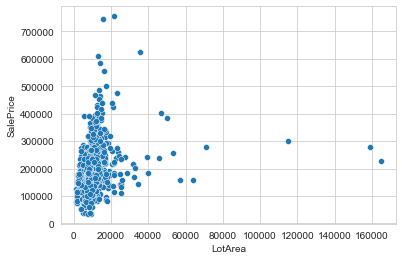

In [42]:
sns.scatterplot(data['LotArea'],data['SalePrice'])
plt.show()

LotArea have a kind of positive liner relationship with SalePrice with some outliers.

LotArea increases, Sale Price increases rapidly

Street  has total unique values =  2 out of  1168
['Pave' 'Grvl']
Feature datatype is =  object
Feature has  0.0 %  missing values


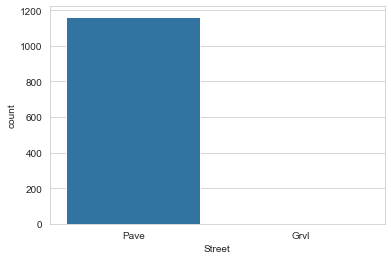

Street
Pave    181684.450172
Grvl    121110.750000
Name: SalePrice, dtype: float64


In [43]:
feature_details('Street')

Street: Type of road access to property

   Grvl Gravel  
   Pave Paved

In [44]:
data['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

LotShape  has total unique values =  4 out of  1168
['IR1' 'Reg' 'IR2' 'IR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


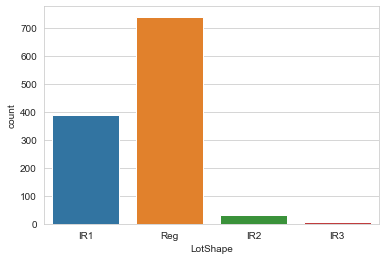

LotShape
IR2    233827.750000
IR3    226120.833333
IR1    206038.464103
Reg    165906.660811
Name: SalePrice, dtype: float64


In [45]:
feature_details('LotShape')

LotShape: General shape of property

   * Reg  Regular 
   * IR1  Slightly irregular
   * IR2  Moderately Irregular
   * IR3  Irregular

LandContour  has total unique values =  4 out of  1168
['Lvl' 'Bnk' 'HLS' 'Low']
Feature datatype is =  object
Feature has  0.0 %  missing values


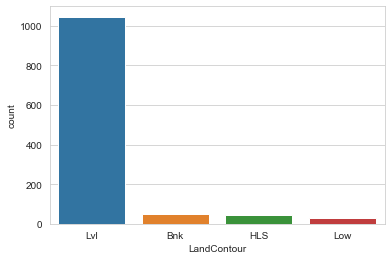

LandContour
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Bnk    146163.140000
Name: SalePrice, dtype: float64


In [46]:
feature_details('LandContour')

LandContour: Flatness of the property

   * Lvl  Near Flat/Level 
   * Bnk  Banked - Quick and significant rise from street grade to building
   * HLS  Hillside - Significant slope from side to side
   * Low  Depression

LotConfig  has total unique values =  5 out of  1168
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


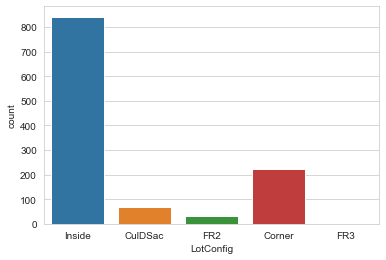

LotConfig
CulDSac    224594.463768
FR3        221500.000000
Corner     182427.635135
Inside     178003.105701
FR2        171138.636364
Name: SalePrice, dtype: float64


In [47]:
feature_details('LotConfig')

LotConfig: Lot configuration

   * Inside   Inside lot
   * Corner   Corner lot
   * CulDSac  Cul-de-sac
   * FR2  Frontage on 2 sides of property
   * FR3  Frontage on 3 sides of property

LandSlope  has total unique values =  3 out of  1168
['Gtl' 'Mod' 'Sev']
Feature datatype is =  object
Feature has  0.0 %  missing values


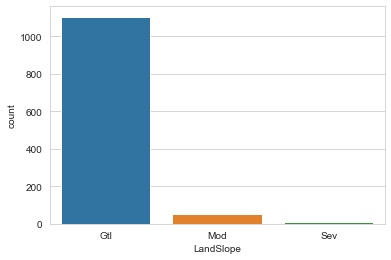

LandSlope
Sev    190160.833333
Mod    185353.313725
Gtl    181203.795475
Name: SalePrice, dtype: float64


In [48]:
feature_details('LandSlope')

LandSlope: Slope of property

   * Gtl  Gentle slope
   * Mod  Moderate Slope  
   * Sev  Severe Slope

Neighborhood  has total unique values =  25 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


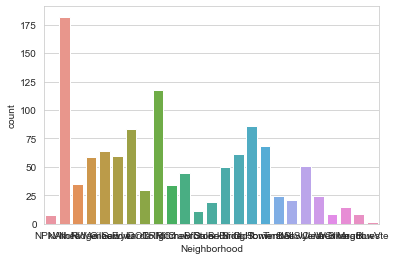

Neighborhood
NoRidge    341260.228571
NridgHt    312548.655738
StoneBr    301145.736842
Veenker    246833.333333
Timber     240579.291667
Somerst    222649.588235
ClearCr    216120.833333
Crawfor    208474.688889
CollgCr    199517.508475
Blmngtn    195987.000000
Gilbert    194790.093750
NWAmes     191643.305085
SawyerW    186909.647059
Mitchel    154654.411765
NAmes      146511.225275
SWISU      142587.333333
NPkVill    141968.750000
Blueste    137500.000000
Sawyer     135029.866667
OldTown    133947.197674
Edwards    128544.216867
BrkSide    122836.000000
BrDale     104081.818182
IDOTRR     101322.666667
MeadowV     88444.444444
Name: SalePrice, dtype: float64


In [49]:
feature_details('Neighborhood')

Neighborhood: Physical locations within Ames city limits

   * Blmngtn  Bloomington Heights
   * Blueste  Bluestem
   * BrDale   Briardale
   * BrkSide  Brookside
   * ClearCr  Clear Creek
   * CollgCr  College Creek
   * Crawfor  Crawford
   * Edwards  Edwards
   * Gilbert  Gilbert
   * IDOTRR   Iowa DOT and Rail Road
   * MeadowV  Meadow Village
   * Mitchel  Mitchell
   * Names    North Ames
   * NoRidge  Northridge
   * NPkVill  Northpark Villa
   * NridgHt  Northridge Heights
   * NWAmes   Northwest Ames
   * OldTown  Old Town
   * SWISU    South & West of Iowa State University
   * Sawyer   Sawyer
   * SawyerW  Sawyer West
   * Somerst  Somerset
   * StoneBr  Stone Brook
   * Timber   Timberland
   * Veenker  Veenker

Condition1  has total unique values =  9 out of  1168
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Feature datatype is =  object
Feature has  0.0 %  missing values


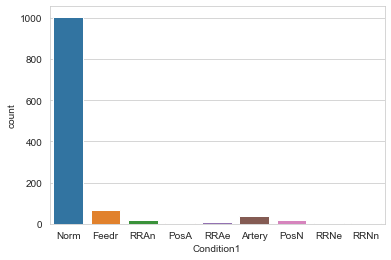

Condition1
RRNn      238000.000000
PosA      237833.333333
PosN      219264.705882
RRNe      190750.000000
RRAn      190074.850000
Norm      184692.003980
Feedr     142799.731343
RRAe      139044.444444
Artery    137926.315789
Name: SalePrice, dtype: float64


In [50]:
feature_details('Condition1')

Condition1: Proximity to various conditions

   * Artery   Adjacent to arterial street
   * Feedr    Adjacent to feeder street   
   * Norm Normal  
   * RRNn Within 200' of North-South Railroad
   * RRAn Adjacent to North-South Railroad
   * PosN Near positive off-site feature--park, greenbelt, etc.
   * PosA Adjacent to postive off-site feature
   * RRNe Within 200' of East-West Railroad
   * RRAe Adjacent to East-West Railroad

In [51]:
data.groupby('Condition1')['SalePrice'].count()

Condition1
Artery      38
Feedr       67
Norm      1005
PosA         6
PosN        17
RRAe         9
RRAn        20
RRNe         2
RRNn         4
Name: SalePrice, dtype: int64

In [52]:
data[data['Condition1'] == 'RRNn']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
279,70,RM,60.0,6155,Pave,IR1,Lvl,FR3,Gtl,BrkSide,RRNn,Feedr,1Fam,2Story,6,8,1920,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,Mn,Unf,0,Unf,0,611,611,GasA,Ex,Y,SBrkr,751,611,0,1362,0,0,2,0,3,1,TA,6,Typ,0,Detchd,1920.0,Fin,2,502,TA,Fa,Y,0,0,84,0,0,0,0,6,2008,WD,Normal,128000
418,20,RL,84.0,11670,Pave,IR1,Lvl,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,0,3,2007,WD,Normal,320000
463,60,RL,NaN,8755,Pave,IR1,Lvl,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,0,6,2009,WD,Normal,214000
493,20,RL,85.0,10182,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,RRNn,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,420.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1220,Unf,0,440,1660,GasA,Ex,Y,SBrkr,1660,0,0,1660,1,0,2,0,3,1,Gd,8,Typ,1,Attchd,2006.0,RFn,2,500,TA,TA,Y,322,50,0,0,0,0,0,5,2006,New,Partial,290000


Condition2  has total unique values =  8 out of  1168
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
Feature datatype is =  object
Feature has  0.0 %  missing values


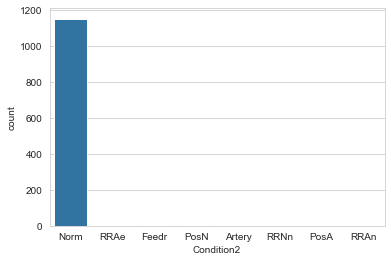

Condition2
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
Norm      181697.129983
RRAn      136905.000000
RRNn      125000.000000
Feedr     121166.666667
Artery    106500.000000
Name: SalePrice, dtype: float64


In [53]:
feature_details('Condition2')

In [55]:
data['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

Condition2: Proximity to various conditions (if more than one is present)

   * Artery   Adjacent to arterial street
   * Feedr    Adjacent to feeder street   
   * Norm Normal  
   * RRNn Within 200' of North-South Railroad
   * RRAn Adjacent to North-South Railroad
   * PosN Near positive off-site feature--park, greenbelt, etc.
   * PosA Adjacent to postive off-site feature
   * RRNe Within 200' of East-West Railroad
   * RRAe Adjacent to East-West Railroad

BldgType  has total unique values =  5 out of  1168
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
Feature datatype is =  object
Feature has  0.0 %  missing values


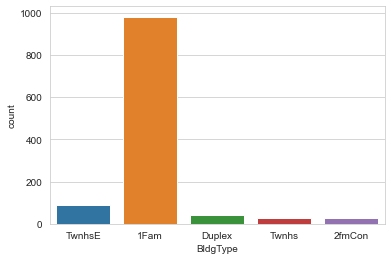

BldgType
TwnhsE    186066.111111
1Fam      185602.300714
Twnhs     139437.931034
Duplex    133871.609756
2fmCon    133737.037037
Name: SalePrice, dtype: float64


In [56]:
feature_details('BldgType')

BldgType: Type of dwelling

   * 1Fam:    Single-family Detached  
   * 2FmCon:   Two-family Conversion; originally built as one-family dwelling
   * Duplx:    Duplex
   * TwnhsE:   Townhouse End Unit
   * TwnhsI:   Townhouse Inside Unit

HouseStyle  has total unique values =  8 out of  1168
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0.0 %  missing values


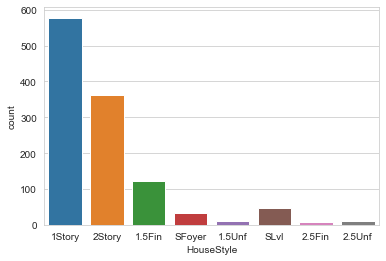

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64


In [57]:
feature_details('HouseStyle')

HouseStyle: Style of dwelling

   - 1Story   One story
   - 1.5Fin   One and one-half story: 2nd level finished
   - 1.5Unf   One and one-half story: 2nd level unfinished
   - 2Story   Two story
   - 2.5Fin   Two and one-half story: 2nd level finished
   - 2.5Unf   Two and one-half story: 2nd level unfinished
   - SFoyer   Split Foyer
   - SLvl Split Level

OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


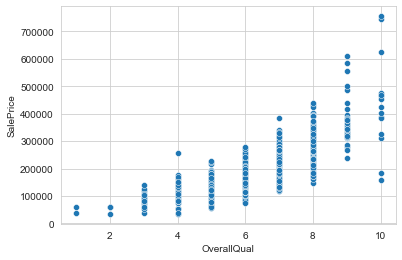

In [58]:
feature_details('OverallQual')

OverallQual: Rates the overall material and finish of the house

   * 10   Very Excellent
   * 9    Excellent
   * 8    Very Good
   * 7    Good
   * 6    Above Average
   * 5    Average
   * 4    Below Average
   * 3    Fair
   * 2    Poor
   * 1    Very Poor

OverallCond  has total unique values =  9 out of  1168
[5 6 7 4 8 2 3 9 1]
Feature datatype is =  int64
Feature has  0.0 %  missing values


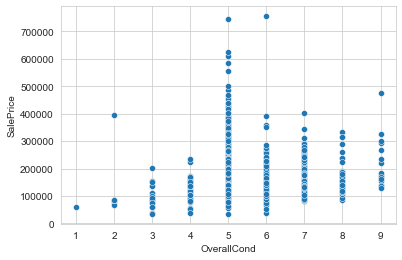

In [59]:
feature_details('OverallCond')

In [60]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

YearBuilt  has total unique values =  110 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


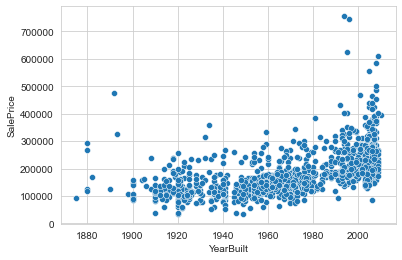

In [61]:
feature_details('YearBuilt')

Year Built have direct positive relationship with SalePrice

New build house have more price

we can do feature extraction on this feature to get house total age

YearRemodAdd  has total unique values =  61 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


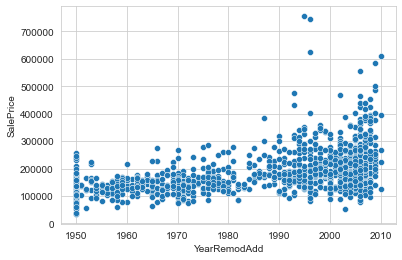

In [62]:
feature_details('YearRemodAdd')

RoofStyle  has total unique values =  6 out of  1168
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
Feature datatype is =  object
Feature has  0.0 %  missing values


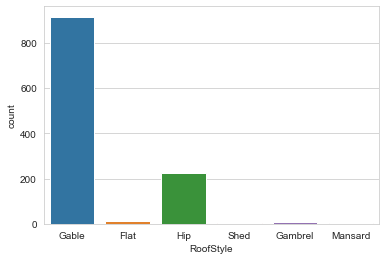

RoofStyle
Shed       225000.000000
Hip        214493.364444
Flat       204080.833333
Mansard    194795.800000
Gable      173251.570492
Gambrel    145111.111111
Name: SalePrice, dtype: float64


In [63]:
feature_details('RoofStyle')

RoofStyle: Type of roof

   * Flat Flat
   * Gable    Gable
   * Gambrel  Gabrel (Barn)
   * Hip  Hip
   * Mansard  Mansard
   * Shed Shed

In [66]:
data['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [67]:
data[data['RoofStyle'] == 'Shed']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
32,90,RL,NaN,18890,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,8300,8,2007,WD,Normal,190000
211,40,RL,NaN,23595,Pave,Reg,Low,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,0,4,2010,WD,Normal,260000


RoofMatl  has total unique values =  8 out of  1168
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Feature datatype is =  object
Feature has  0.0 %  missing values


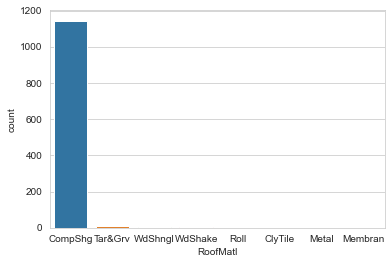

RoofMatl
WdShngl    390250.000000
WdShake    254250.000000
Membran    241500.000000
Tar&Grv    195747.000000
CompShg    180009.329545
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64


In [68]:
feature_details('RoofMatl')

RoofMatl: Roof material

   * ClyTile  Clay or Tile
   * CompShg  Standard (Composite) Shingle
   * Membran  Membrane
   * Metal    Metal
   * Roll Roll
   * Tar&Grv  Gravel & Tar
   * WdShake  Wood Shakes
   * WdShngl  Wood Shingles

Exterior1st  has total unique values =  14 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


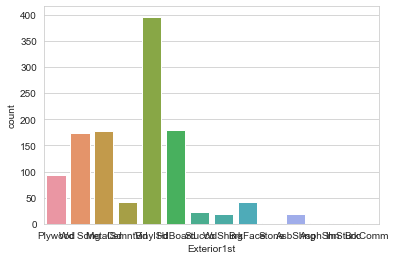

Exterior1st
ImStucc    262000.000000
Stone      258500.000000
CemntBd    242928.476190
VinylSd    215359.676768
BrkFace    198391.463415
Plywood    178890.075269
HdBoard    163432.648045
Stucco     160602.272727
WdShing    155481.578947
Wd Sdng    152572.724138
MetalSd    148498.196629
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
Name: SalePrice, dtype: float64


In [69]:
feature_details('Exterior1st')

Exterior1st: Exterior covering on house

   * AsbShng  Asbestos Shingles
   * AsphShn  Asphalt Shingles
   * BrkComm  Brick Common
   * BrkFace  Brick Face
   * CBlock   Cinder Block
   * CemntBd  Cement Board
   * HdBoard  Hard Board
   * ImStucc  Imitation Stucco
   * MetalSd  Metal Siding
   * Other    Other
   * Plywood  Plywood
   * PreCast  PreCast 
   * Stone    Stone
   * Stucco   Stucco
   * VinylSd  Vinyl Siding
   * Wd Sdng  Wood Siding
   * WdShing  Wood Shingles

Exterior2nd  has total unique values =  15 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


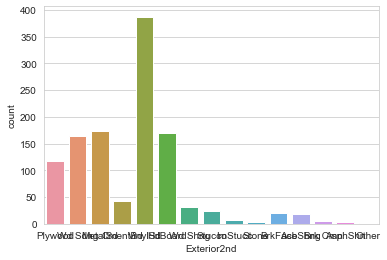

Exterior2nd
Other      319000.000000
ImStucc    273712.500000
CmentBd    247940.380952
VinylSd    215607.100775
BrkFace    194772.500000
Stone      174406.000000
Plywood    169979.042373
HdBoard    168398.200000
Wd Shng    156650.000000
Stucco     153066.695652
Wd Sdng    152218.969697
MetalSd    148570.398844
AsphShn    138000.000000
Brk Cmn    131300.000000
AsbShng    114372.833333
Name: SalePrice, dtype: float64


In [70]:
feature_details('Exterior2nd')

MasVnrType  has total unique values =  4 out of  1168
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
Feature datatype is =  object
Feature has  0.5993150684931506 %  missing values


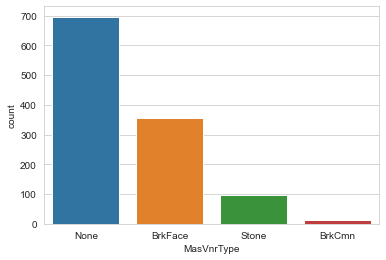

MasVnrType
Stone      261417.867347
BrkFace    205275.432203
None       158226.787356
BrkCmn     141990.076923
Name: SalePrice, dtype: float64


In [71]:
feature_details('MasVnrType')

MasVnrType: Masonry veneer type

  * BrkCmn   Brick Common
  * BrkFace  Brick Face
  * CBlock   Cinder Block
  * None None
  * Stone    Stone

MasVnrArea  has total unique values =  283 out of  1168
Feature datatype is =  float64
Feature has  0.5993150684931506 %  missing values


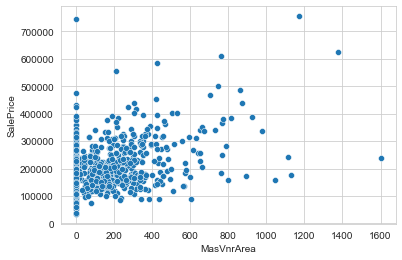

In [72]:
feature_details('MasVnrArea')

* MasVnrArea: Masonry veneer area in square feet

ExterQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


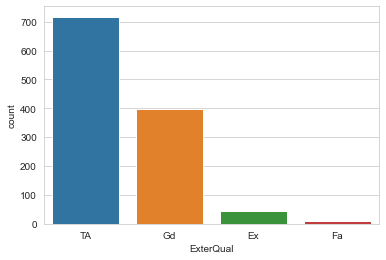

ExterQual
Ex    357817.651163
Gd    231009.743073
TA    144918.163180
Fa     87435.727273
Name: SalePrice, dtype: float64


In [73]:
feature_details('ExterQual')

ExterQual: Evaluates the quality of the material on the exterior

   * Ex   Excellent
   * Gd   Good
   * TA   Average/Typical
   * Fa   Fair
   * Po   Poor

ExterCond  has total unique values =  5 out of  1168
['TA' 'Gd' 'Fa' 'Po' 'Ex']
Feature datatype is =  object
Feature has  0.0 %  missing values


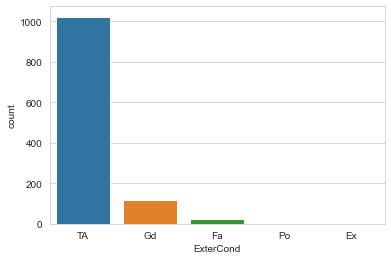

ExterCond
Ex    243000.000000
TA    184551.990215
Gd    171391.837607
Fa    105294.769231
Po     76500.000000
Name: SalePrice, dtype: float64


In [74]:
feature_details('ExterCond')

ExterCond: Evaluates the present condition of the material on the exterior

   * Ex   Excellent
   * Gd   Good
   * TA   Average/Typical
   * Fa   Fair
   * Po   Poor

Foundation  has total unique values =  6 out of  1168
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
Feature datatype is =  object
Feature has  0.0 %  missing values


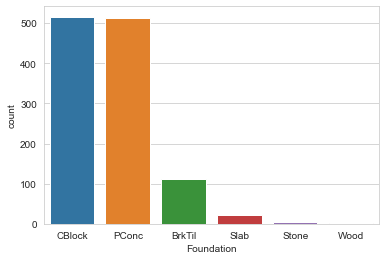

Foundation
PConc     225757.504873
Stone     177651.000000
Wood      164000.000000
CBlock    149858.994186
BrkTil    137895.285714
Slab      110846.428571
Name: SalePrice, dtype: float64


In [75]:
feature_details('Foundation')

Foundation: Type of foundation

  * BrkTil   Brick & Tile
  * CBlock   Cinder Block
  * PConc    Poured Contrete 
  * Slab     Slab
  * Stone    Stone
  * Wood     Wood

BsmtQual  has total unique values =  4 out of  1168
['Gd' 'TA' 'Ex' nan 'Fa']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


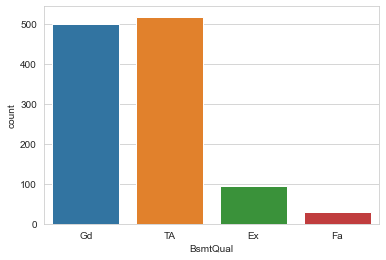

BsmtQual
Ex    331469.978723
Gd    203225.445783
TA    140898.736944
Fa    121349.000000
Name: SalePrice, dtype: float64


In [77]:
feature_details('BsmtQual')

BsmtQual: Evaluates the height of the basement

   * Ex   Excellent (100+ inches) 
   * Gd   Good (90-99 inches)
   * TA   Typical (80-89 inches)
   * Fa   Fair (70-79 inches)
   * Po   Poor (<70 inches
   * NA   No Basement

BsmtCond  has total unique values =  4 out of  1168
['TA' 'Gd' 'Fa' nan 'Po']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


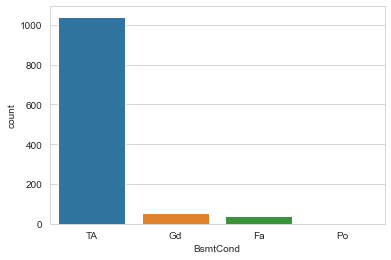

BsmtCond
Gd    219908.107143
TA    184018.669549
Fa    121075.102564
Po     64000.000000
Name: SalePrice, dtype: float64


In [78]:
feature_details('BsmtCond')

BsmtCond: Evaluates the general condition of the basement

   * Ex   Excellent
   * Gd   Good
   * TA   Typical - slight dampness allowed
   * Fa   Fair - dampness or some cracking or settling
   * Po   Poor - Severe cracking, settling, or wetness
   * NA   No Basement

BsmtExposure  has total unique values =  4 out of  1168
['No' 'Gd' 'Av' 'Mn' nan]
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


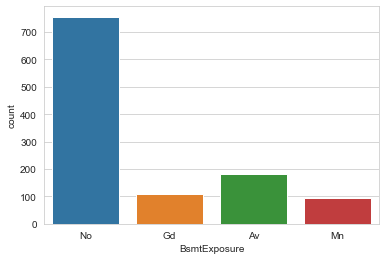

BsmtExposure
Gd    250581.138889
Av    204174.861111
Mn    194213.838710
No    167539.144180
Name: SalePrice, dtype: float64


In [79]:
feature_details('BsmtExposure')

BsmtExposure: Refers to walkout or garden level walls

   * Gd   Good Exposure
   * Av   Average Exposure (split levels or foyers typically score average or above)  
   * Mn   Mimimum Exposure
   * No   No Exposure
   * NA   No Basement

BsmtFinType1  has total unique values =  6 out of  1168
['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


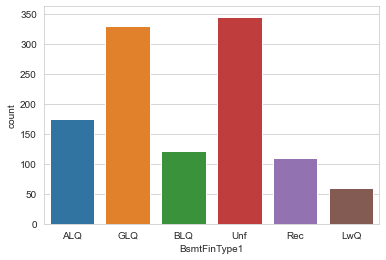

BsmtFinType1
GLQ    236871.596970
Unf    172159.521739
ALQ    161003.879310
BLQ    152803.396694
LwQ    152712.711864
Rec    143592.844037
Name: SalePrice, dtype: float64


In [80]:
feature_details('BsmtFinType1')

BsmtFinType1: Rating of basement finished area

   * GLQ  Good Living Quarters
   * ALQ  Average Living Quarters
   * BLQ  Below Average Living Quarters   
   * Rec  Average Rec Room
   * LwQ  Low Quality
   * Unf  Unfinshed
   * NA   No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2  has total unique values =  6 out of  1168
['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


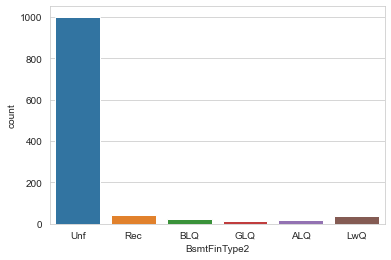

BsmtFinType2
GLQ    194937.500000
ALQ    194712.500000
Unf    185077.455090
LwQ    168846.250000
Rec    164477.325581
BLQ    154815.958333
Name: SalePrice, dtype: float64


In [81]:
feature_details('BsmtFinType2')

BsmtFinSF2  has total unique values =  122 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


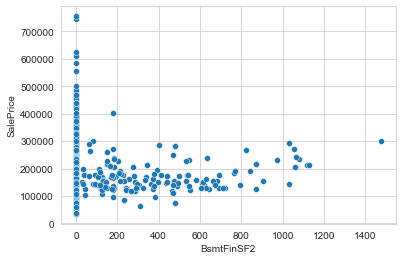

In [82]:
feature_details('BsmtFinSF2')

* BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF  has total unique values =  681 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


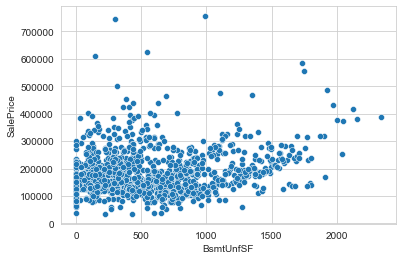

In [83]:
feature_details('BsmtUnfSF')

* This has weak positive correlation with SalePrice.

TotalBsmtSF  has total unique values =  636 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


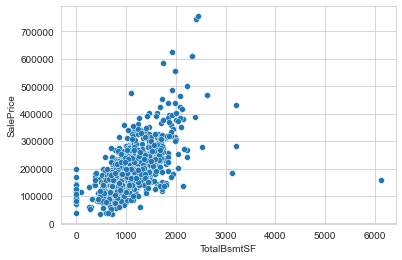

In [84]:
feature_details('TotalBsmtSF')

TotalBsmtSF: Total square feet of basement area

as the total basement area increases, saleprice increases

Heating  has total unique values =  6 out of  1168
['GasA' 'GasW' 'Floor' 'OthW' 'Wall' 'Grav']
Feature datatype is =  object
Feature has  0.0 %  missing values


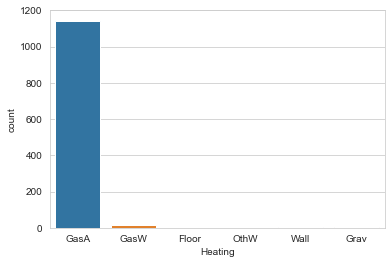

Heating
GasA     182591.394576
GasW     167312.785714
OthW     129500.000000
Wall      92100.000000
Floor     72500.000000
Grav      70080.000000
Name: SalePrice, dtype: float64


In [85]:
feature_details('Heating')

Heating: Type of heating

   * Floor    Floor Furnace
   * GasA Gas forced warm air furnace
   * GasW Gas hot water or steam heat
   * Grav Gravity furnace 
   * OthW Hot water or steam heat other than gas
   * Wall Wall furnace

HeatingQC  has total unique values =  5 out of  1168
['TA' 'Ex' 'Gd' 'Fa' 'Po']
Feature datatype is =  object
Feature has  0.0 %  missing values


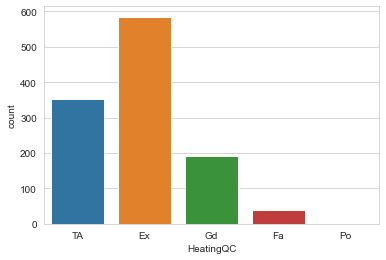

HeatingQC
Ex    215954.223932
Gd    158909.833333
TA    142684.883523
Fa    126556.710526
Po     87000.000000
Name: SalePrice, dtype: float64


In [86]:
feature_details('HeatingQC')

HeatingQC: Heating quality and condition

   * Ex   Excellent
   * Gd   Good
   * TA   Average/Typical
   * Fa   Fair
   * Po   Poor

CentralAir  has total unique values =  2 out of  1168
['Y' 'N']
Feature datatype is =  object
Feature has  0.0 %  missing values


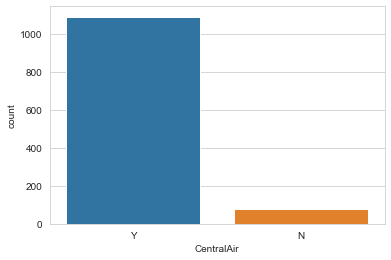

CentralAir
Y    186696.381651
N    108539.576923
Name: SalePrice, dtype: float64


In [87]:
feature_details('CentralAir')

In [89]:
data['CentralAir'].value_counts(normalize = True)

Y    0.933219
N    0.066781
Name: CentralAir, dtype: float64

Electrical  has total unique values =  5 out of  1168
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Feature datatype is =  object
Feature has  0.0 %  missing values


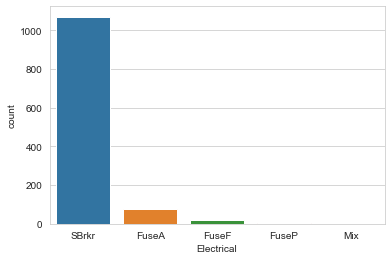

Electrical
SBrkr    187253.339252
FuseA    121840.986486
FuseF    109611.285714
FuseP    109500.000000
Mix       67000.000000
Name: SalePrice, dtype: float64


In [90]:
feature_details('Electrical')

1stFlrSF  has total unique values =  669 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


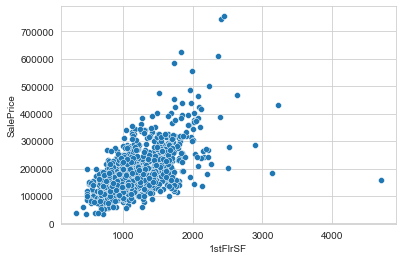

In [91]:
feature_details('1stFlrSF')

2ndFlrSF  has total unique values =  351 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


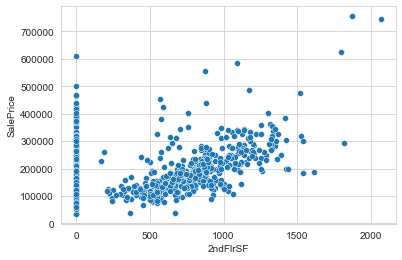

In [92]:
feature_details('2ndFlrSF')

LowQualFinSF  has total unique values =  21 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


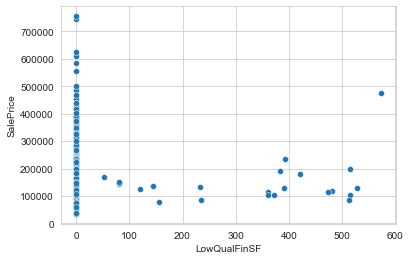

In [93]:
feature_details('LowQualFinSF')

GrLivArea  has total unique values =  746 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


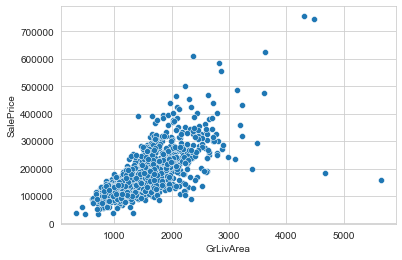

In [94]:
feature_details('GrLivArea')

BsmtFullBath  has total unique values =  4 out of  1168
[0 1 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


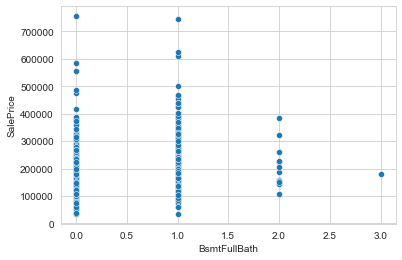

In [95]:
feature_details('BsmtFullBath')

In [96]:
data['BsmtFullBath'].value_counts()

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64

BsmtHalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


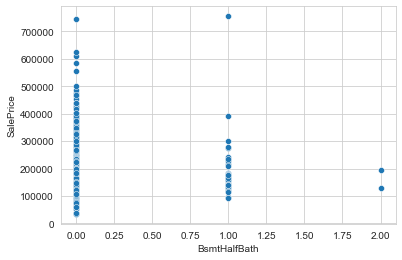

In [97]:
feature_details('BsmtHalfBath')

In [98]:
data['BsmtHalfBath'].value_counts()

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

FullBath  has total unique values =  4 out of  1168
[2 1 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


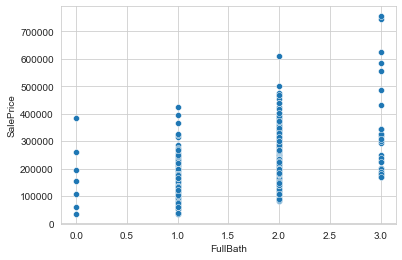

In [99]:
feature_details('FullBath')

In [100]:
data['FullBath'].value_counts()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

HalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


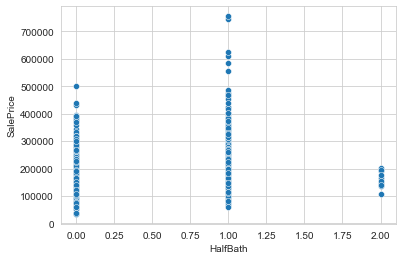

In [101]:
feature_details('HalfBath')

BedroomAbvGr  has total unique values =  8 out of  1168
[2 4 3 1 5 0 6 8]
Feature datatype is =  int64
Feature has  0.0 %  missing values


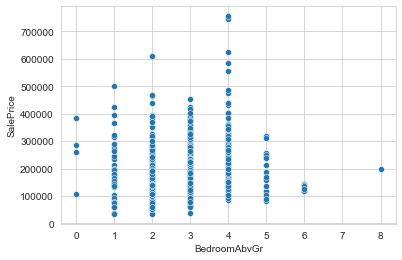

In [102]:
feature_details('BedroomAbvGr')

In [103]:
data['BedroomAbvGr'].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

KitchenAbvGr  has total unique values =  4 out of  1168
[1 2 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


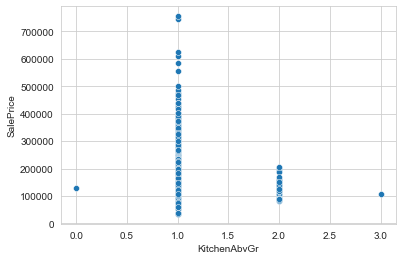

In [104]:
feature_details('KitchenAbvGr')

KitchenQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


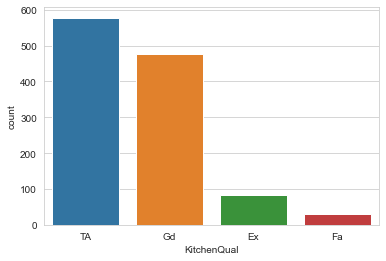

KitchenQual
Ex    327812.329268
Gd    211076.234310
TA    140206.313149
Fa    105028.100000
Name: SalePrice, dtype: float64


In [105]:
feature_details('KitchenQual')

KitchenQual: Kitchen quality

   * Ex   Excellent
   * Gd   Good
   * TA   Typical/Average
   * Fa   Fair
   * Po   Poor

TotRmsAbvGrd  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


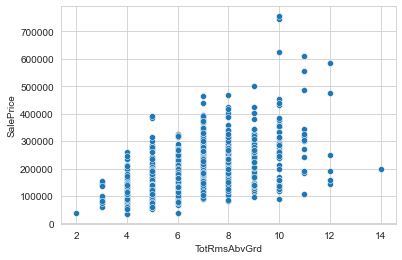

In [106]:
feature_details('TotRmsAbvGrd')

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional  has total unique values =  7 out of  1168
['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']
Feature datatype is =  object
Feature has  0.0 %  missing values


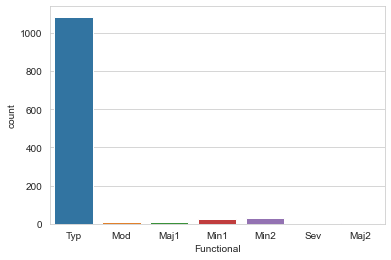

Functional
Typ     184204.948387
Min1    152630.000000
Maj1    151443.090909
Min2    146841.666667
Mod     145241.666667
Sev     129000.000000
Maj2     86000.000000
Name: SalePrice, dtype: float64


In [107]:
feature_details('Functional')

Functional: Home functionality (Assume typical unless deductions are warranted)

   * Typ  Typical Functionality
   * Min1 Minor Deductions 1
   * Min2 Minor Deductions 2
   * Mod  Moderate Deductions
   * Maj1 Major Deductions 1
   * Maj2 Major Deductions 2
   * Sev  Severely Damaged
   * Sal  Salvage only

Fireplaces  has total unique values =  4 out of  1168
[1 0 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


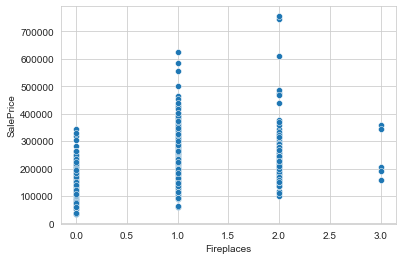

In [108]:
feature_details('Fireplaces')

In [109]:
data['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

GarageType  has total unique values =  6 out of  1168
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


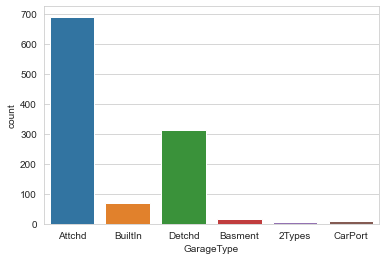

GarageType
BuiltIn    254970.900000
Attchd     203675.839363
Basment    160708.937500
2Types     144200.000000
Detchd     135873.799363
CarPort    109957.375000
Name: SalePrice, dtype: float64


In [111]:
feature_details('GarageType')

GarageType: Garage location

  * 2Types   More than one type of garage
  * Attchd   Attached to home
  * Basment  Basement Garage
  * BuiltIn  Built-In (Garage part of house - typically has room above garage)
  * CarPort  Car Port
  * Detchd   Detached from home
  * NA   No Garage

GarageYrBlt  has total unique values =  97 out of  1168
Feature datatype is =  float64
Feature has  5.47945205479452 %  missing values


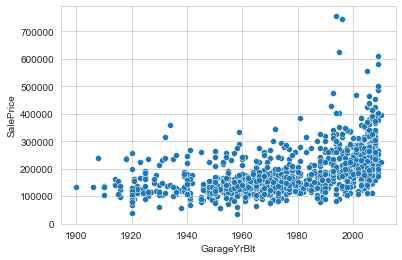

In [112]:
feature_details('GarageYrBlt')

GarageFinish  has total unique values =  3 out of  1168
['RFn' 'Unf' 'Fin' nan]
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


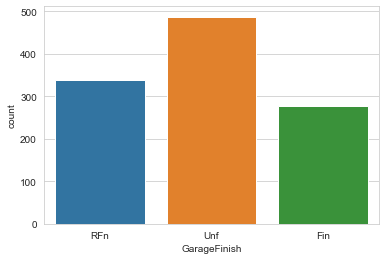

GarageFinish
Fin    241223.809353
RFn    201925.554572
Unf    143555.156057
Name: SalePrice, dtype: float64


In [113]:
feature_details('GarageFinish')

GarageFinish: Interior finish of the garage

   * Fin  Finished
   * RFn  Rough Finished  
   * Unf  Unfinished
   * NA   No Garage

GarageCars  has total unique values =  5 out of  1168
[2 3 1 0 4]
Feature datatype is =  int64
Feature has  0.0 %  missing values


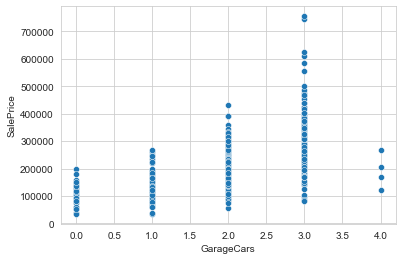

In [116]:
feature_details('GarageCars')

* GarageCars: Size of garage in car capacity

GarageArea  has total unique values =  392 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


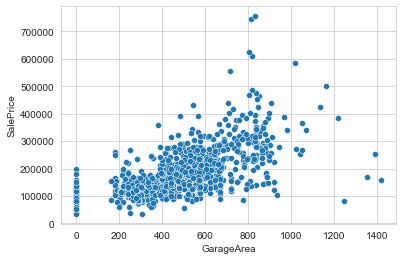

In [115]:
feature_details('GarageArea')

* GarageArea: Size of garage in square feet

GarageQual  has total unique values =  5 out of  1168
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


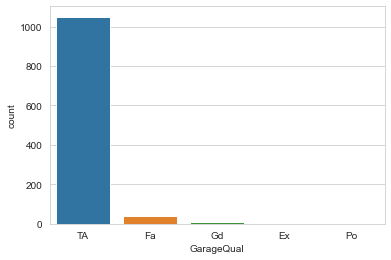

GarageQual
Ex    297750.000000
Gd    219822.727273
TA    187753.449524
Fa    129889.000000
Po    102000.000000
Name: SalePrice, dtype: float64


In [117]:
feature_details('GarageQual')

GarageCond  has total unique values =  5 out of  1168
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


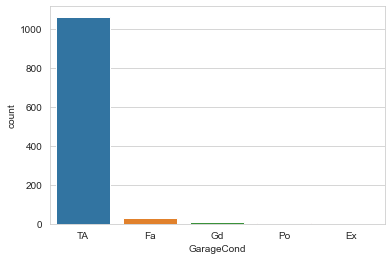

GarageCond
TA    188483.112158
Gd    179921.250000
Ex    120500.000000
Fa    115031.821429
Po    110500.000000
Name: SalePrice, dtype: float64


In [118]:
feature_details('GarageCond')

GarageCond: Garage condition

  * Ex   Excellent
  * Gd   Good
  * TA   Typical/Average
  * Fa   Fair
  * Po   Poor
  * NA   No Garage

PavedDrive  has total unique values =  3 out of  1168
['Y' 'N' 'P']
Feature datatype is =  object
Feature has  0.0 %  missing values


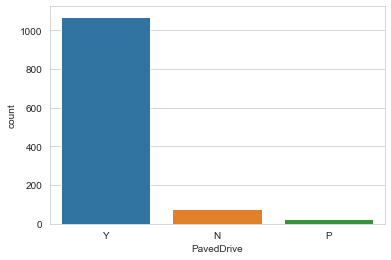

PavedDrive
Y    187006.026144
P    133326.086957
N    116421.472973
Name: SalePrice, dtype: float64


In [119]:
feature_details('PavedDrive')

PavedDrive: Paved driveway

   * Y    Paved 
   * P    Partial Pavement
   * N    Dirt/Gravel

WoodDeckSF  has total unique values =  244 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


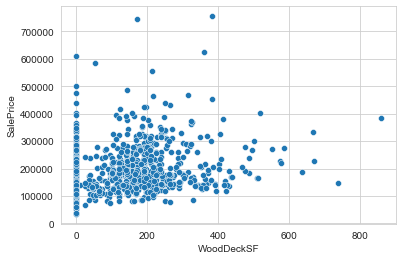

In [120]:
feature_details('WoodDeckSF')

OpenPorchSF  has total unique values =  176 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


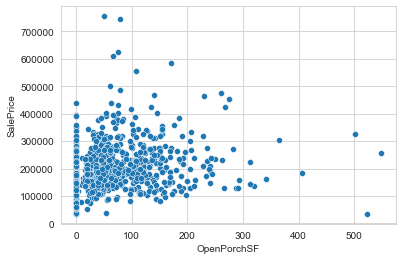

In [121]:
feature_details('OpenPorchSF')

EnclosedPorch  has total unique values =  106 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


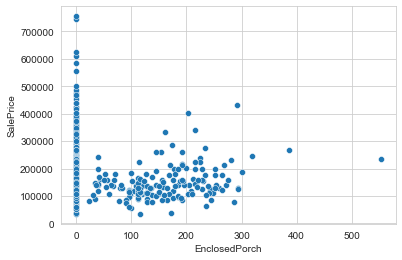

In [122]:
feature_details('EnclosedPorch')

3SsnPorch  has total unique values =  18 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


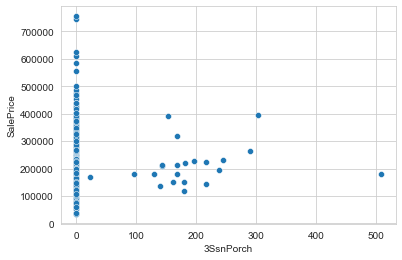

In [123]:
feature_details('3SsnPorch')

ScreenPorch  has total unique values =  65 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


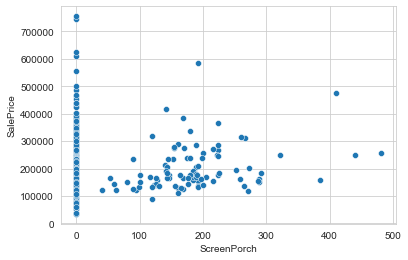

In [124]:
feature_details('ScreenPorch')

PoolArea  has total unique values =  8 out of  1168
[  0 555 576 738 519 480 648 512]
Feature datatype is =  int64
Feature has  0.0 %  missing values


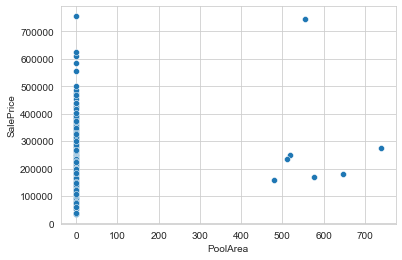

In [126]:
feature_details('PoolArea')

MiscVal  has total unique values =  20 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


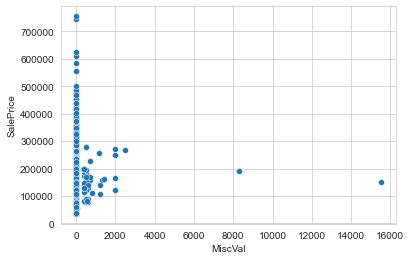

In [127]:
feature_details('MiscVal')

MoSold  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


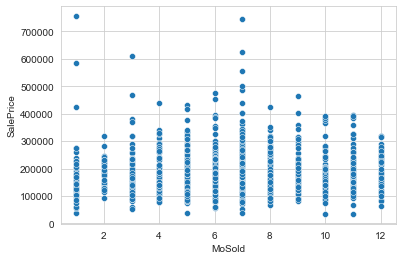

In [128]:
feature_details('MoSold')

YrSold  has total unique values =  5 out of  1168
[2007 2010 2009 2006 2008]
Feature datatype is =  int64
Feature has  0.0 %  missing values


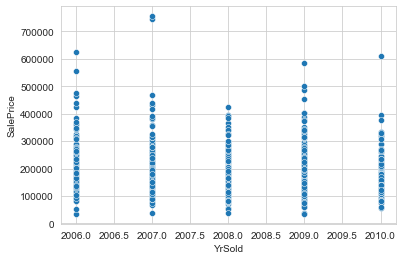

In [129]:
feature_details('YrSold')

In [130]:
data['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

SaleType  has total unique values =  9 out of  1168
['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
Feature datatype is =  object
Feature has  0.0 %  missing values


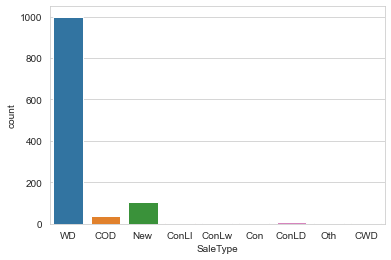

SaleType
New      271104.500000
Con      269600.000000
ConLI    200390.000000
WD       173668.456456
CWD      171166.666667
COD      146722.368421
ConLD    146141.000000
ConLw    143625.000000
Oth      119850.000000
Name: SalePrice, dtype: float64


In [131]:
feature_details('SaleType')

SaleType: Type of sale

  * WD   Warranty Deed - Conventional
  * CWD  Warranty Deed - Cash
  * VWD  Warranty Deed - VA Loan
  * New  Home just constructed and sold
  * COD  Court Officer Deed/Estate
  * Con  Contract 15% Down payment regular terms
  * ConLw    Contract Low Down payment and low interest
  * ConLI    Contract Low Interest
  * ConLD    Contract Low Down
  * Oth  Other

SaleCondition  has total unique values =  6 out of  1168
['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Feature datatype is =  object
Feature has  0.0 %  missing values


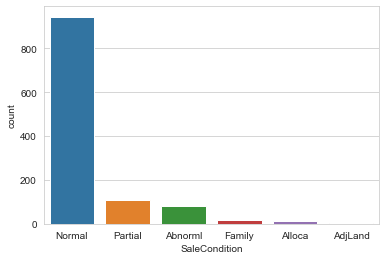

SaleCondition
Partial    269585.231481
Normal     175436.408466
Alloca     167377.416667
Family     149138.888889
Abnorml    147567.938272
AdjLand    104125.000000
Name: SalePrice, dtype: float64


In [132]:
feature_details('SaleCondition')

SaleCondition: Condition of sale

   * Normal   Normal Sale
   * Abnorml  Abnormal Sale -  trade, foreclosure, short sale
   * AdjLand  Adjoining Land Purchase
   * Alloca   Allocation - two linked properties with separate deeds, typically condo with a garage unit  
   * Family   Sale between family members
   * Partial  Home was not completed when last assessed (associated with New Homes)

In [133]:
#As 3 features are providing same information as 1 feature, lets drop those 3 features and have that 1 
data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis = 1, inplace = True)

In [134]:
data.shape

(1168, 71)

In [135]:
continuous = [x for x in data.columns if data[x].dtypes != 'O']
categorical = [x for x in data.columns if data[x].dtypes == 'O']

In [136]:
len(continuous), len(categorical), data.shape[1]

(34, 37, 71)

In [137]:
data['LotFrontage'].dtypes  , data['GarageYrBlt'].dtypes , data['MasVnrArea'].dtypes

(dtype('float64'), dtype('float64'), dtype('float64'))

# Handle Null Values

In [138]:
#Continuous feature null values

cont_null = [x for x in continuous if data[x].isnull().sum() > 0]

for i in cont_null:
    data[i].fillna(data[i].mode()[0],inplace = True)

In [139]:
data[cont_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [140]:
data[continuous].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [141]:
data[categorical].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
GarageType       64
GarageFinish     64
GarageQual       64
GarageCond       64
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [142]:
cat_null = [x for x in categorical if data[x].isnull().sum()>0]

for i in cat_null:
    data[i].fillna(data[i].mode()[0],inplace = True)

In [143]:
data[categorical].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [144]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt 

* All missing values have been handled.

# Handling Outliers

Before that we need to handle features with Years details:

* YearBuilt - when house build
* YearRemodAdd  - when modification done
* GarageYrBlt - garage build year
* yearsold - when the house sold

* we can extract some useful information from here, like total age of house at the time of sell years after modification at the time of sell garage age at the time of sell we even dnt require YrSold if we able to collect abouve informations because these details will definately help

In [145]:
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['ModificationAge'] = data['YrSold'] - data['YearRemodAdd']
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']

In [146]:
# So now, we can drop the year features
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

In [148]:
#Many continuous features are categorical in nature, we have to avoid outliers detection on those features

outlier = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF', 'ModificationAge', 'GarageAge']

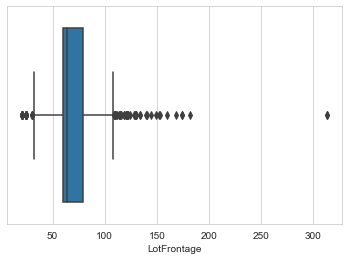

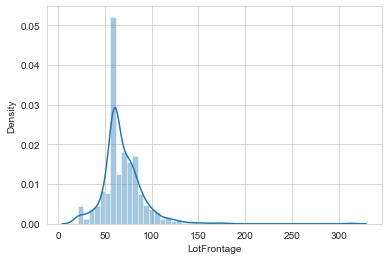

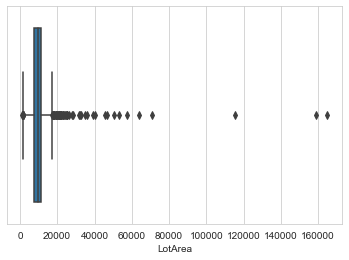

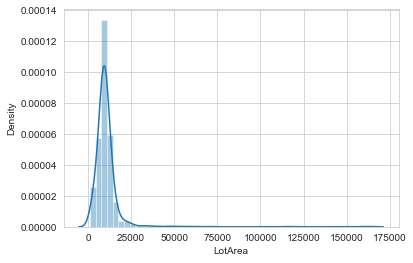

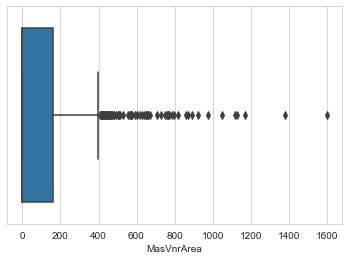

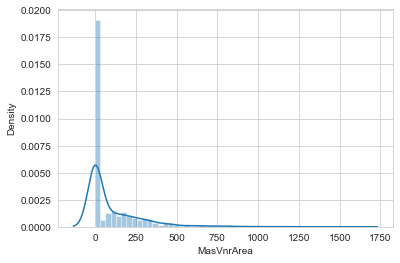

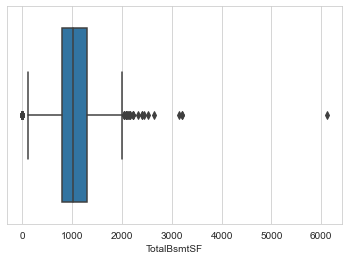

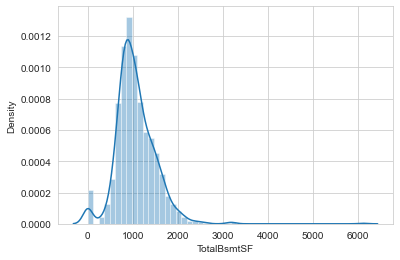

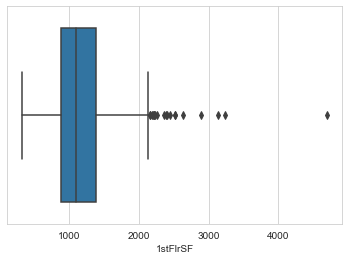

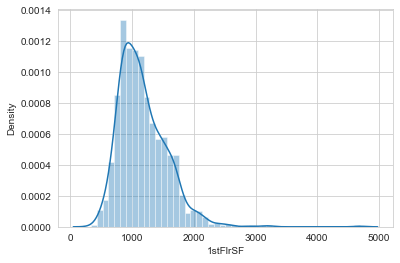

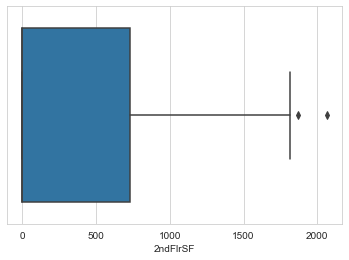

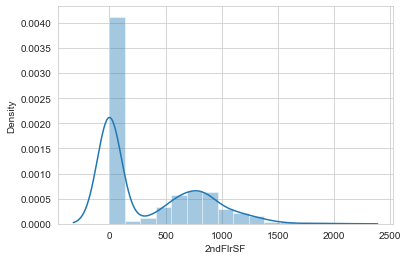

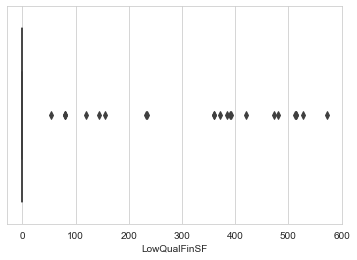

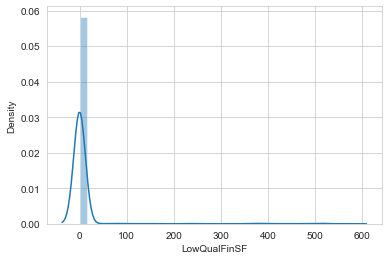

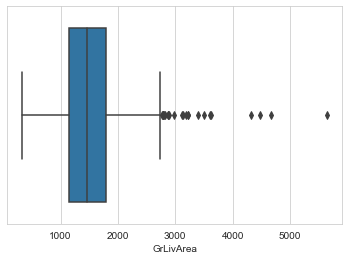

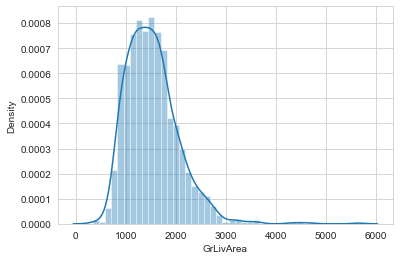

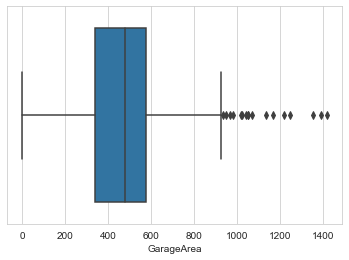

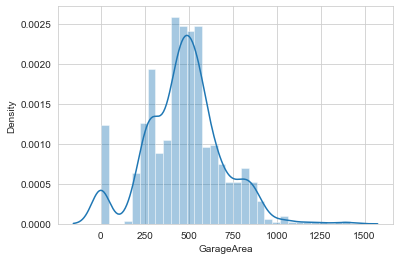

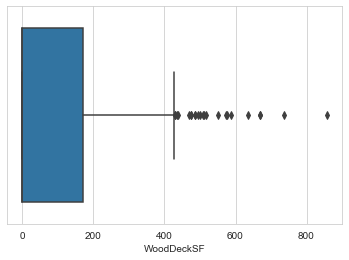

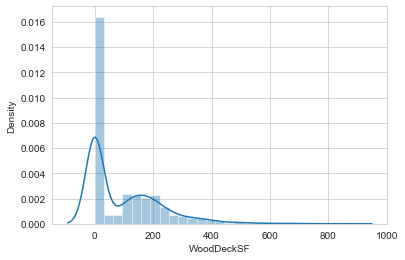

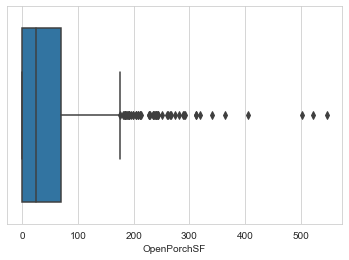

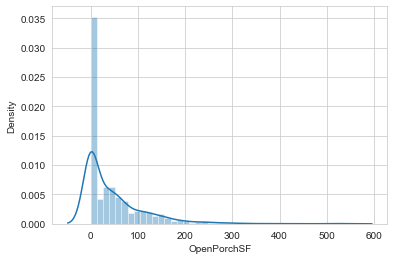

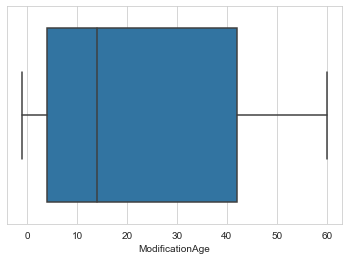

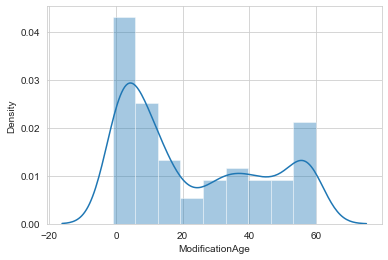

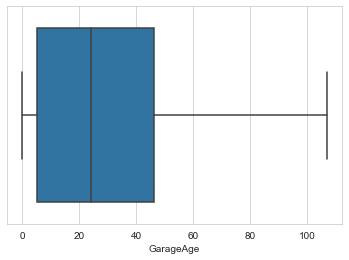

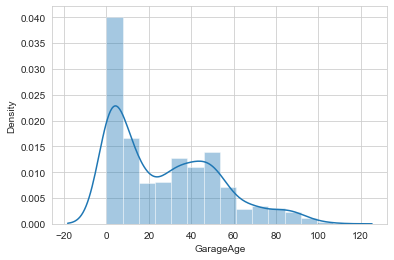

In [149]:
for i in outlier:
    sns.boxplot(data[i])
    plt.show()
    sns.distplot(data[i])
    plt.show()

In [150]:
data[outlier].skew()

LotFrontage         2.815783
LotArea            10.659285
MasVnrArea          2.835718
TotalBsmtSF         1.744591
1stFlrSF            1.513707
2ndFlrSF            0.823479
LowQualFinSF        8.666142
GrLivArea           1.449952
GarageArea          0.189665
WoodDeckSF          1.504929
OpenPorchSF         2.410840
ModificationAge     0.495051
GarageAge           0.699249
dtype: float64

# Handling Outliers using IQR method

In [151]:
for i in outlier:
    IQR = data[i].quantile(.75) - data[i].quantile(.25)
    lower = data[i].quantile(.25) - (1.5 * IQR)
    upper = data[i].quantile(.75) + (1.5 * IQR)
    data[i] = np.where(data[i]<lower,lower,data[i])
    data[i] = np.where(data[i]>upper,upper,data[i])

In [152]:
data[outlier].skew()

LotFrontage        0.347416
LotArea            0.184194
MasVnrArea         1.294984
TotalBsmtSF        0.243671
1stFlrSF           0.663710
2ndFlrSF           0.808038
LowQualFinSF       0.000000
GrLivArea          0.587651
GarageArea        -0.107166
WoodDeckSF         1.060148
OpenPorchSF        1.154030
ModificationAge    0.495051
GarageAge          0.699249
dtype: float64

In [153]:
continuous = [x for x in data.columns if data[x].dtypes != 'O']
categorical = [x for x in data.columns if data[x].dtypes == 'O']

In [154]:
data[continuous].shape , data[categorical].shape

((1168, 33), (1168, 37))

# Encoding for Categorical Columns

In [155]:
for i in categorical:
    print(i)
    print(data[i].unique())
    print('*' * 50)

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
**************************************************
Street
['Pave' 'Grvl']
**************************************************
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
**************************************************
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
**************************************************
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
**************************************************
LandSlope
['Gtl' 'Mod' 'Sev']
**************************************************
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
**************************************************
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
**************************************************
Condition2
['Norm' 'RRAe' 'Feedr' '

In [156]:
ordinal_cols = {
    'ExterQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'ExterCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'BsmtCond' : {'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
    'BsmtFinType1' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'BsmtFinType2' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'HeatingQC' :{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1  },
    'KitchenQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1},
    
      
    
    
    'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
}

In [157]:
data.replace(ordinal_cols, inplace = True)

In [160]:
data.shape

(1168, 70)

In [158]:
encoded = pd.get_dummies(data)

In [159]:
encoded.shape

(1168, 220)

# Spliting dataset into X and Y 

In [161]:
#Spliting input and output features
x = encoded.drop('SalePrice', axis=1)
y = encoded['SalePrice']

In [162]:
x.shape, y.shape

((1168, 219), (1168,))

# Feature Selection

In [164]:
mutual_info = mutual_info_regression(x,y)

In [165]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns

In [166]:
(mutual_info.sort_values(ascending = False)!= 0).count()

219

In [167]:
pd.DataFrame(mutual_info).value_counts(ascending = False)

0.000000    57
0.063960     1
0.034927     1
0.037423     1
0.037595     1
0.038238     1
0.039626     1
0.039642     1
0.040744     1
0.042739     1
0.042966     1
0.043071     1
0.043212     1
0.043934     1
0.046331     1
0.046406     1
0.054083     1
0.060231     1
0.062955     1
0.034608     1
0.034108     1
0.034040     1
0.028037     1
0.025408     1
0.025646     1
0.026220     1
0.026435     1
0.027241     1
0.027475     1
0.027747     1
0.028594     1
0.033321     1
0.028673     1
0.029734     1
0.029878     1
0.029911     1
0.032801     1
0.032884     1
0.032903     1
0.063089     1
0.066136     1
0.023929     1
0.068227     1
0.184264     1
0.200396     1
0.203583     1
0.207119     1
0.245142     1
0.262172     1
0.262785     1
0.269026     1
0.281903     1
0.316396     1
0.322994     1
0.327348     1
0.344312     1
0.351923     1
0.355638     1
0.364549     1
0.453095     1
0.170505     1
0.163248     1
0.162750     1
0.085819     1
0.068590     1
0.069738     1
0.070684  

In [168]:
219-53

166

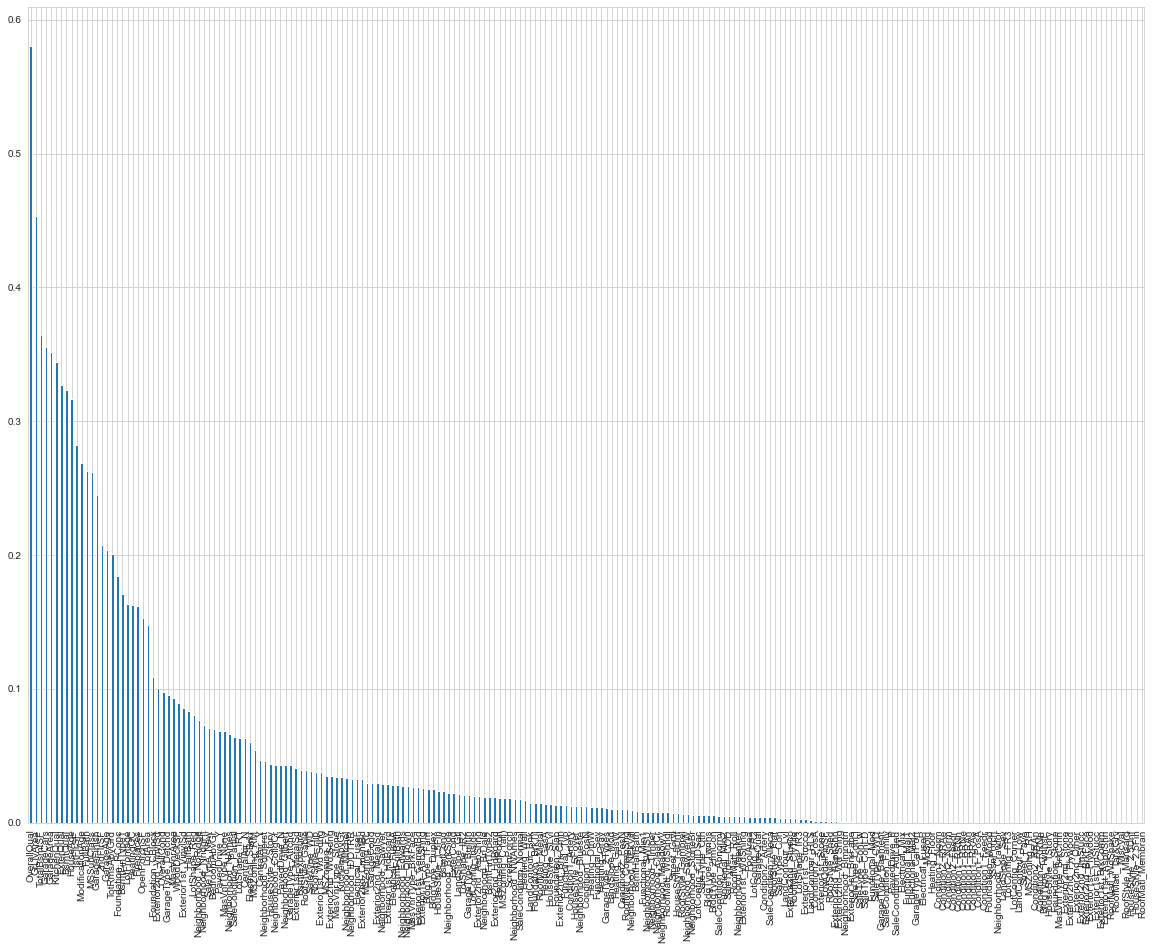

In [170]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20,15))
plt.show()

In [172]:
selected = SelectPercentile(mutual_info_regression, percentile = 76)

In [173]:
selected.fit(x,y)

SelectPercentile(percentile=76,
                 score_func=<function mutual_info_regression at 0x00000235B5FA7E50>)

In [174]:
selected.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,

In [175]:
selectedfeatures = x.columns[selected.get_support()]

In [176]:
len(selectedfeatures)

166

In [177]:
# Here , we have selected only the features have some dependency on target feature.
inputdata = x[selectedfeatures]

In [178]:
inputdata.shape

(1168, 166)

In [179]:
inputdata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,HouseAge,ModificationAge,GarageAge,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_2.5Fin,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Stone,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min2,Functional_Sev,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,120,60.0,4928.0,6,5,0.0,3,3,4,3,2,6,2,1078.00,3,958.0,0.0,958.0,0,0,2,0,2,1,3,5,1,2,2,440.0,3,0.0,175.0,0,0,0,2,31,31.0,30.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,20,95.0,15865.0,8,6,0.0,4,4,3,4,5,6,4,2030.25,5,2142.0,0.0,2217.0,1,0,2,0,4,1,4,8,1,1,2,621.0,3,81.0,175.0,0,224,0,10,37,37.0,37.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,60,92.0,9920.0,7,5,0.0,4,3,4,3,4,7,2,1117.00,5,1127.0,886.0,2013.0,1,0,2,1,3,1,3,8,1,1,2,455.0,3,180.0,130.0,0,0,0,6,11,10.0,10.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,20,105.0,11751.0,6,6,400.0,3,3,4,3,2,5,2,1844.00,5,1844.0,0.0,1844.0,0,0,2,0,3,1,3,7,1,2,2,546.0,3,0.0,122.0,0,0,0,1,33,33.0,33.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,

In [180]:
#Lets remove skewness of some categorical features:
skew_feature=['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']

In [181]:
for feature in skew_feature:
    inputdata[feature]= np.log(inputdata[feature])

In [182]:
inputdata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,HouseAge,ModificationAge,GarageAge,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_2.5Fin,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Stone,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min2,Functional_Sev,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,120,4.094345,8.502689,6,5,0.0,3,3,4,3,2,6,2,6.982863,3,6.864848,0.0,6.864848,0,0,2,0,2,1,3,5,1,2,2,440.0,3,0.0,175.0,0,0,0,2,31,31.0,30.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,20,4.553877,9.671871,8,6,0.0,4,4,3,4,5,6,4,7.615914,5,7.669495,0.0,7.703910,1,0,2,0,4,1,4,8,1,1,2,621.0,3,81.0,175.0,0,224,0,10,37,37.0,37.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,60,4.521789,9.202308,7,5,0.0,4,3,4,3,4,7,2,7.018402,5,7.027315,886.0,7.607381,1,0,2,1,3,1,3,8,1,1,2,455.0,3,180.0,130.0,0,0,0,6,11,10.0,10.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,20,4.653960,9.371694,6,6,400.0,3,3,4,3,2,5,2,7.519692,5,7.519692,0.0,7.519692,0,0,2,0,3,1,3,7,1,2,2,546.0,3,0.0,122.0,0,0,0,1,33,33.0,33.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

# Standardization

In [184]:
scaler = MinMaxScaler()
X = scaler.fit_transform(inputdata)

In [186]:
X.shape , y.shape

((1168, 166), (1168,))

# Model Building

In [188]:
LR = LinearRegression()

In [189]:
# FInd best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,y,random_state = i,test_size = .20)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8733717208176643 on Random State = 89


In [190]:
#Best Random state is 89
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 89,test_size = .3)
LR.fit(x_train,y_train)

LinearRegression()

In [193]:
#Regression models
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [196]:
#Checking R2, MAE, MSE, RMSE and CV score for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Training R2 Score of',m,'model', r2_score(y_train, m.predict(x_train)) * 100)
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test)) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, x, y, cv = 10).mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 26861512325936.32
MSE of LinearRegression() model 2.5326083599363333e+29
RMSE of LinearRegression() model 503250271727331.8
Training R2 Score of LinearRegression() model 90.52258647596085
Test R2 Score of LinearRegression() model -3.434851734471517e+21
cross Validation score of  LinearRegression()  is  0.8208490341656551
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 21136.76941095636
MSE of Ridge() model 1195597128.3231368
RMSE of Ridge() model 34577.40777332993
Training R2 Score of Ridge() model 89.79034238777905
Test R2 Score of Ridge() model 83.78470617520536
cross Validation score of  Ridge()  is  0.8381981141175787
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 21442.355148510615
MSE of Lasso() model 1112418783.4470348
RMSE of Lasso() model 33352.9426504924
Training R2 Score of Lasso() model 90.53574367247379
Test R2 Score of Lasso() model 84.91281301828366
cross Validation score of  Lasso(

MAE of  AdaBoostRegressor() model 24369.674792050562
MSE of AdaBoostRegressor() model 1280339668.1023703
RMSE of AdaBoostRegressor() model 35781.834331157064
Training R2 Score of AdaBoostRegressor() model 87.90266048622959
Test R2 Score of AdaBoostRegressor() model 82.63538492858538
cross Validation score of  AdaBoostRegressor()  is  0.7725274401432765
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  GradientBoostingRegressor() model 17749.251351570085
MSE of GradientBoostingRegressor() model 825938029.5706586
RMSE of GradientBoostingRegressor() model 28739.137592674186
Training R2 Score of GradientBoostingRegressor() model 96.85079384380009
Test R2 Score of GradientBoostingRegressor() model 88.7982101049841
cross Validation score of  GradientBoostingRegressor()  is  0.8603153129239658
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 




* XGBoost Regressor giving the best score 

# Hypertune XGBoost Regressor

In [197]:
params = {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [199]:
GCV = GridSearchCV(XGB_model, params, cv = 10, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_ca...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='r2')

In [200]:
GCV.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.01,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 7}

In [208]:
XGB_model = GCV.best_estimator_
GCV_pred = XGB_model.predict(x_test)
r2_score(y_test, GCV_pred)

0.8871542766759308

 * We have successfully hypertuned the best model which is XGB Regressor.

# Saving Model

In [209]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(XGB_model, open('House_model', 'wb'))

In [210]:
#Loading saved model
loaded_model = pickle.load(open('House_model','rb'))

In [211]:
#Prediction using saved model
Sale_price = loaded_model.predict(x_test)
Sale_price

array([150945.84 , 122345.14 , 131959.77 , 215557.64 , 207784.39 ,
       112354.14 , 347684.4  , 136553.9  , 129850.83 , 193733.9  ,
        83149.96 , 136843.06 , 170125.67 , 250140.86 , 145172.89 ,
       193693.53 , 127372.87 , 174837.08 , 125219.07 , 185401.86 ,
       307511.28 , 202150.98 , 177560.62 , 131759.95 , 291645.5  ,
       134887.03 , 140762.3  , 205435.52 , 234274.2  , 180116.69 ,
       266150.84 , 270524.1  ,  87397.336, 167280.39 , 356131.44 ,
       236171.2  , 288307.72 , 177216.64 , 203515.69 , 185018.89 ,
       143723.47 , 221559.39 , 182295.55 , 216393.56 , 338728.34 ,
       188717.05 , 192482.7  , 242302.06 , 364748.56 , 136633.81 ,
       284493.16 , 144929.84 , 244854.22 , 141451.89 , 133512.08 ,
       108694.53 ,  88914.52 , 136206.62 , 267844.66 , 326790.3  ,
       333090.5  , 129752.77 , 138474.16 , 187356.64 , 107484.266,
       129759.516,  84602.266, 133036.69 , 228654.88 ,  90169.89 ,
       144016.84 ,  86235.89 , 125112.695, 239063.97 , 134884.

In [212]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Sale Price': y_test, 'Predicted Sale Price': Sale_price})
DF.head()

,Actual Sale Price,Predicted Sale Price
398,144900,150945.843750
1006,89471,122345.140625
971,133000,131959.765625
2,269790,215557.640625
586,186500,207784.390625


# Visualizing Error Residual

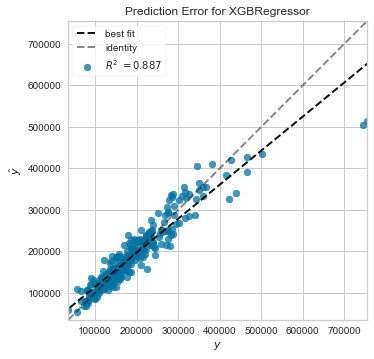

In [213]:
#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(XGB_model)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

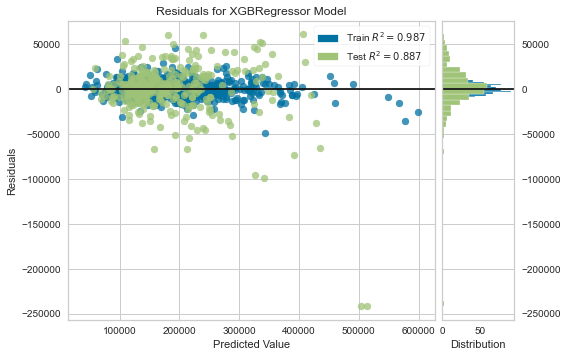

In [214]:
#Residual for Regression model
visualizer = ResidualsPlot(XGB_model)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()